In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# missing data handling and cleaning

In [4]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no missing values

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# feature selection using correlation

## one feature selection

<AxesSubplot:>

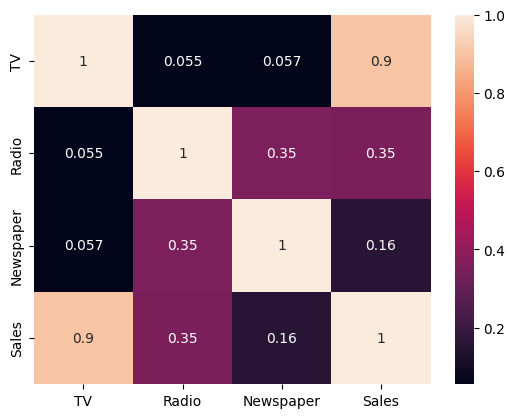

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

* the tv column has strong positive correlation with sales
* the radio column has medium positive correlation with sales
* the newspaper column has low positive correlation with sales

choosing TV because it has the highest correlation with sales

In [12]:
x= df[['TV']]
y= df.Sales

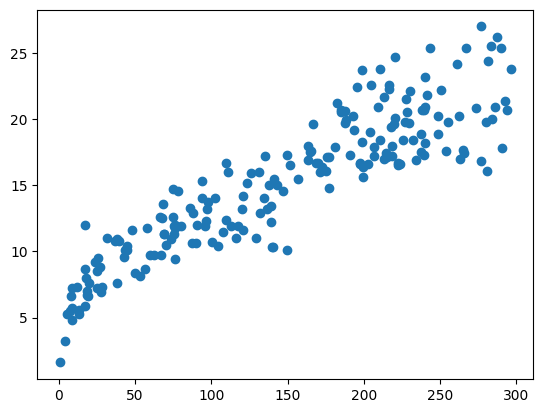

In [15]:
import matplotlib.pyplot as plt
plt.scatter(x=x,y=y)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

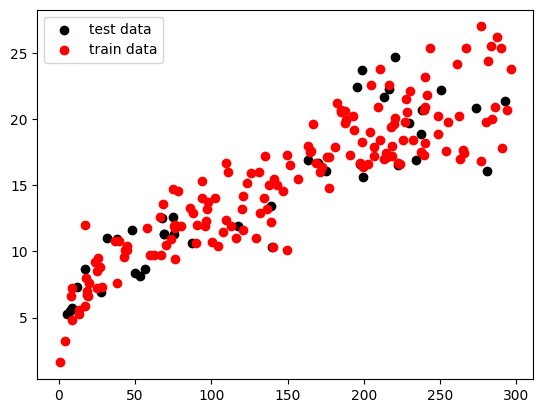

In [17]:
plt.scatter(x=X_test,y=y_test,label='test data',color='black')
plt.scatter(x=X_train,y=y_train,label='train data',color='red')
plt.legend()

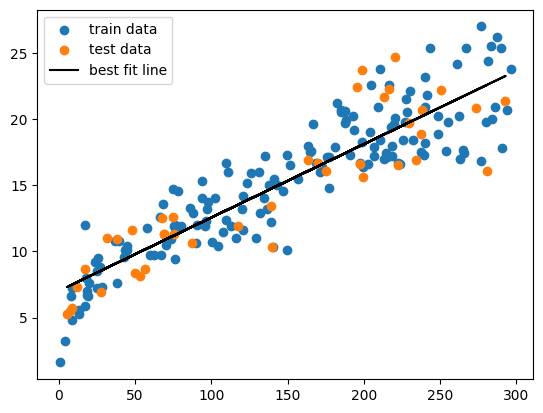

In [19]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plt.scatter(X_train,y_train,label='train data')
plt.scatter(X_test,y_test,label='test data')
plt.plot(X_test,y_pred,label='best fit line',color='black')
plt.legend()